        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Preprocessing and Data Visualization</h1>

## 1. Preprocessing

<p> Preprocessing is a major step in data science. The phrase <b>"garbage in, garbage out"</b> is particularly applicable to data mining and machine learning projects. Data-gathering methods are often loosely controlled, resulting in out-of-range values (e.g., Income: −100), impossible data combinations (e.g., Sex: Male, Pregnant: Yes), missing values, etc. Analyzing data that has not been carefully screened for such problems can produce misleading results. Thus, the representation and quality of data is first and foremost before running an analysis.</p>

Source: Wikipedia

<p><b>Note:</b> One common issue is that your captured data does not have headings (column names). You can easily handle this issue by defining headers. Let's see an example.</p>

In [1]:
import pandas as pd

In [1]:
pip install seaborn

     |████████████████████████████████| 285 kB 5.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Use following shell commands to download the data
# download iris data set
!curl -O http://aima.cs.berkeley.edu/data/iris.csv

# iris is a flower dataset. The data set consists of 50 
# samples from each of three species of Iris (Iris setosa, 
# Iris virginica and Iris versicolor). Four features were 
# measured from each sample: the length and the width of the 
# sepals and petals, in centimeters. 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3800  100  3800    0     0  10439      0 --:--:-- --:--:-- --:--:-- 10468


In [4]:
iris_dataset = pd.read_csv('iris.csv', header = None , names= ['sepal_length', 'sepal_width','petal_length','petal_width','target'])
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris_dataset.shape

(150, 5)

In [6]:
iris_dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [7]:
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
target          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 1.1. Handling Missing Data

In [9]:
# Let's use new datasets
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   148k      0 --:--:-- --:--:-- --:--:--  148k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   3830      0 --:--:-- --:--:-- --:--:--  3830
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   4152      0 --:--:-- --:--:-- --:--:--  4152


In [10]:
areas_data = pd.read_csv('state-areas.csv')
abbrevs_data = pd.read_csv('state-abbrevs.csv')
pop_data = pd.read_csv('state-population.csv')

In [11]:
areas_data.sample(5)

,state,area (sq. mi)
17,Louisiana,51843
11,Idaho,83574
44,Vermont,9615
13,Indiana,36420
33,North Dakota,70704


In [ ]:
areas_data.values

In [12]:
abbrevs_data.sample(5)
#print(abbrevs_data.shape)

,state,abbreviation
5,Colorado,CO
2,Arizona,AZ
32,Maryland,MD
16,Kansas,KS
10,Georgia,GA


In [13]:
pop_data.sample(10)
#pop_data.shape --> 25444

,state/region,ages,year,population
825,KY,total,1992,3765469.0
2520,USA,total,2002,287625193.0
2250,VA,total,1993,6509630.0
1403,NH,total,1996,1174719.0
1708,OH,total,2003,11434788.0
484,GA,under18,2010,2490884.0
590,ID,total,2005,1428241.0
1565,NY,under18,2000,4687374.0
2111,TX,total,2012,26060796.0
1071,MI,under18,2005,2531839.0


<p><b>Note:</b> To check presence of missing data you can use <b style="color:blue">isnull( )</b> function.</p>

In [14]:
areas_data.isnull().any()

state            False
area (sq. mi)    False
dtype: bool

In [15]:
abbrevs_data.isnull().sum()

state           0
abbreviation    0
dtype: int64

In [16]:
pop_data.isnull().sum()

state/region     0
ages             0
year             0
population      20
dtype: int64

In [17]:
pop_data.sample(10)

,state/region,ages,year,population
1784,OR,under18,1994,793435.0
2132,UT,total,2004,2401580.0
2276,WA,total,1999,5842564.0
2452,PR,total,1993,NaN
1633,ND,under18,2012,156765.0
1528,NM,total,2009,2036802.0
1584,NC,under18,1990,1625804.0
2533,USA,under18,2008,74104602.0
1315,NE,under18,1999,451047.0
950,ME,under18,2013,261276.0


In [18]:
pop_data.isnull().sum()

state/region     0
ages             0
year             0
population      20
dtype: int64

In [19]:
pop_data.shape

(2544, 4)

<p><b>Note:</b> You also need to check the percentage of missing values in each column.</p>
<ul>
    <li>If a <u>large</u> percentage of data in a column is missing, then you need to drop the column.</li>
    <li>If a <u>small</u> percentage of data in a column is missing, then you can: 
        <ol>
            <li> Fill the missing values will representative data</li>
            <li> Or you can remove rows containing missing values</li>
        </ol>
    </li>
</ul>

In [20]:
# you can use the following code to check the percentage of missing data in each column
pop_data.isnull().sum()/len(pop_data) 

state/region    0.000000
ages            0.000000
year            0.000000
population      0.007862
dtype: float64

In [21]:
# We can see that a small percentage of data is null (0.78%) -- less than 1 percent
# Let's check the null data
filter_mask = pop_data.population.isnull()
pop_data.loc[filter_mask,:]  
# How can you check 

,state/region,ages,year,population
2448,PR,under18,1990,NaN
2449,PR,total,1990,NaN
2450,PR,total,1991,NaN
2451,PR,under18,1991,NaN
2452,PR,total,1993,NaN
2453,PR,under18,1993,NaN
2454,PR,under18,1992,NaN
2455,PR,total,1992,NaN
2456,PR,under18,1994,NaN
2457,PR,total,1994,NaN


<p><b>Note:</b> There are three prominent ways to handle small sample of missing data.</p>

<p>
    <ul>
        <li>Fill them with a fix value. You can use <b style="color:blue">fillna( )</b> function.</li>
        <li>Fill them with mean or median value. You can use <b style="color:blue">fillna( )</b> function along with either <b style="color:blue">mean( )</b> or <b style="color:blue">median( )</b>.</li>
        <li>Drop them using <b style="color:blue">dropna( )</b> function.</li>
    </ul>
</p>     

In [22]:
# to fill NaN values with a fix value
pop_data = pop_data.fillna(-1)
pop_data.isnull().any()

state/region    False
ages            False
year            False
population      False
dtype: bool

In [23]:
# let's read data again
pop_data = pd.read_csv('state-population.csv')
# to fill Nan values with mean population of other states
pop_data = pop_data.fillna(pop_data.mean(axis=0))
pop_data.isnull().any()

state/region    False
ages            False
year            False
population      False
dtype: bool

In [24]:
# let's read data again
pop_data = pd.read_csv('state-population.csv')
# now we can drop NaN values
print("Shape of dataset before drop was {}".format(pop_data.shape))
pop_data = pop_data.dropna()
print("Shape of dataset after drop is {}".format(pop_data.shape))

Shape of dataset before drop was (2544, 4)
Shape of dataset after drop is (2524, 4)


In [ ]:
from sklearn.preprocessing import imputer
imp = Imputer(missing_values='NaN', strategy='mean',axis=0)
imp.fit(x)
X = imp.transform(X)

In [ ]:
from sklearn.preprocessing import scale
X_scaled = scale(X)
np.mean(X),np.std(X)

np.mean(X_scaled),np.std(X_scaled)

In [ ]:
#scaling in a pipeline
from sklearn.preprocessing import Standardscaler
steps = [('scaler',StandardScaler()), 
        ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
#train, test split
knn_scaled = pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
accuracy_score(y_test,y_pred)

### 1.2. Handling Duplicated Data

<p>Presence of duplicated data cause bias in our data analysis. So we need to check them and remove them from the dataset.</p>

In [25]:
# here is an example
my_data = pd.DataFrame({'Product':['red shirt','red shirt','red shirt', 'white dress'],
                        'price':[49.33,49.33,32.49,199.99],
                        'in_stock':[True,True,True,False]})
my_data

,Product,price,in_stock
0,red shirt,49.33,True
1,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False


In [26]:
my_data.shape

(4, 3)

In [ ]:
my_data.drop_duplicates()

In [ ]:
data.head()

In [27]:
my_data = my_data.drop_duplicates()
my_data

,Product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False


<p><b>Note:</b> To remove duplicated rows you can use <b style="color:blue">drop_duplicates( )</b> function.</p>

In [28]:
my_data = my_data.drop_duplicates()
my_data

,Product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False


### 1.3. Working with Dates

<p><b>Note:</b> Pandas cannot detect <b>Date</b> columns automatically and you need to specify it. There are two common forms of Date measures:</p>
    
* Timestamp - represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970
* YYYYMMDD

<p>You can use <b style="color:red;">parse_dates</b> parameters to specify date columns.</p>

In [29]:
sample_data = pd.DataFrame({'userId': [1,2,3,4,5,6],
                            'birth_date':[19840201,19881212,19911022,19981108,19860707,19781111]}) 
sample_data.head()

,userId,birth_date
0,1,19840201
1,2,19881212
2,3,19911022
3,4,19981108
4,5,19860707


<p><b>Note:</b> You can save data in csv format using <b style="color:blue">to_csv( )</b> function.</p>

In [30]:
pd.DataFrame.to_csv(sample_data, 'sampleData.csv')

In [31]:
pd.DataFrame.to_csv(sample_data,'sampleData.csv')

In [32]:
#sample_data.to_csv['sampleData.csv', index=false]

In [ ]:
new_sample = pd.read_csv('sampleData.csv', parse_dates=['birth'])

In [33]:
new_sample = pd.read_csv('sampleData.csv', parse_dates=['birth_date'])
new_sample.head()

,Unnamed: 0,userId,birth_date
0,0,1,1984-02-01
1,1,2,1988-12-12
2,2,3,1991-10-22
3,3,4,1998-11-08
4,4,5,1986-07-07


In [34]:
new_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
Unnamed: 0    6 non-null int64
userId        6 non-null int64
birth_date    6 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 272.0 bytes


### 1.4. Preprocessing the Data Values

In [35]:
my_data = pd.DataFrame({'Product':['red shirt','red shirt', 'white dress','blue pants', 'white tuxedo'],
                        'price':[49.33,32.49,199.99, 93.93, 91.2],
                        'in_stock':[True,True,False,True,False],
                        'best_sell_season':['spring','spring','summer','winter','fall']})
my_data

,Product,price,in_stock,best_sell_season
0,red shirt,49.33,True,spring
1,red shirt,32.49,True,spring
2,white dress,199.99,False,summer
3,blue pants,93.93,True,winter
4,white tuxedo,91.20,False,fall


In [36]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
Product             5 non-null object
price               5 non-null float64
in_stock            5 non-null bool
best_sell_season    5 non-null object
dtypes: bool(1), float64(1), object(2)
memory usage: 253.0+ bytes


<p><b>Note:</b> Imagining that we want to conduct data analysis on the above table, we should first think about changing all the variables to numeric types.</p>

<p><b>Note:</b> In order to change <u>boolean values</u> to numeric values, one possible approach is to use Pandas' <b style="color:blue">map( )</b> function.</p>

In [37]:
# here is an example
my_data.in_stock = my_data.in_stock.map({False:0,True:1})
#my_data.best_sell_season = my_data.best_sell_season.map({'spring':0, 'summer':1, 'fall':2, 'winter':3})
my_data

,Product,price,in_stock,best_sell_season
0,red shirt,49.33,1,spring
1,red shirt,32.49,1,spring
2,white dress,199.99,0,summer
3,blue pants,93.93,1,winter
4,white tuxedo,91.20,0,fall


In [38]:
my_data = pd.get_dummies(my_data, columns=['best_sell_season'])
my_data.head()

,Product,price,in_stock,best_sell_season_fall,best_sell_season_spring,best_sell_season_summer,best_sell_season_winter
0,red shirt,49.33,1,0,1,0,0
1,red shirt,32.49,1,0,1,0,0
2,white dress,199.99,0,0,0,1,0
3,blue pants,93.93,1,0,0,0,1
4,white tuxedo,91.20,0,1,0,0,0


In [39]:
my_data.in_stock = my_data.in_stock.map({False:0,True:1})
my_data

,Product,price,in_stock,best_sell_season_fall,best_sell_season_spring,best_sell_season_summer,best_sell_season_winter
0,red shirt,49.33,1,0,1,0,0
1,red shirt,32.49,1,0,1,0,0
2,white dress,199.99,0,0,0,1,0
3,blue pants,93.93,1,0,0,0,1
4,white tuxedo,91.20,0,1,0,0,0


<p><b>Note:</b> In order to change <u>categorical values</u> to numeric values, one possible approach is to convert them to dummy variables using Pandas' <b style="color:blue">get_dummies( )</b> function.</p>

In [42]:
# here is an example
#my_data = pd.get_dummies(my_data, columns=['best_sell_season'])
#my_data.head()

## 2. Visualization Using Matplotlib

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt

<p><b>Helpful Note:</b> It is convenient to use Matplotlib in an interactive format. In order to do that you can use the following magic line code:</p>
<ul>
    <li><b style='color:blue'>%matplotlib notebook</b> : will lead to interactive plots embedded within the notebook</li>
    <li><b style='color:blue'>%matplotlib inline</b> : will lead to static images of your plot embedded in the notebook. Any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic</li>
</ul>

<p>Keep in mind that if you want to use Matplotlib in script format then you need to use functions such as <b style="color:blue;">plt.draw( )</b> or <b style="color:blue;">plt.show( )</b>. But you don't need them if you want to use Matplotlib in an interactive format in Jupyter.  

<p><b>Note:</b> You can use <b style="color:blue;">plt.style.use( )</b> to define the style of your grid.</p>

<table style="border:0;background-color:white;">
    <tr style="background-color:white;">
        <td style='text-align:center;'><b style="color:blue;">plt.style.use(</b><b style="color:red;">'classic'</b><b style="color:blue;">)</b></td>
        <td>&nbsp;</td>
        <td style='text-align:center;'><b style="color:blue;">plt.style.use(</b><b style="color:red;">'seaborn-whitegrid'</b><b style="color:blue;">)</b></td>
    </tr>
    <tr>
        <td><img src="Images/classic.png" width=200px height=200px ></td>
        <td>&nbsp;</td>
        <td><img src="Images/whitegrid.png" width=200px height=200px ></td>
    </tr>
</table>

### 2.1. Line Plots

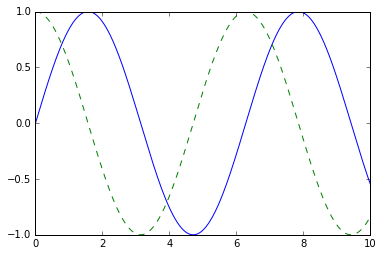

In [45]:
# Let's see an example 
import numpy as np
x = np.linspace(0, 10, 10000)    # generates a list containing 1000 decimal values between 0 and 10 with equal distance    

plt.style.use('classic')        # You don't need to set this everytime

%matplotlib inline
fig = plt.figure()              # initialize a grid of for the plot
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');   # why we need ; ? try the code without ;

<p><b>Note:</b> You can use <b style="color:blue;">savefig( )</b> function to save your figure in current active directory.</p>

In [46]:
fig.savefig('my_fig.png')

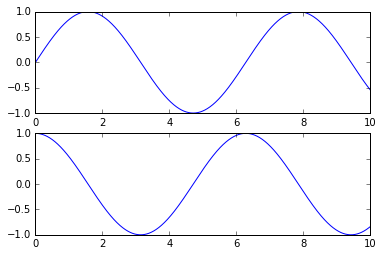

In [47]:
# What if you want to have two above plots in two separate Axes side by side?
%matplotlib inline
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(2)       # fig is a grid of plots, ax is an array of two Axes objects
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

<p><b>Note:</b> You can use the <b style="color:red;">color</b> attribute to specify your desired color.</p>

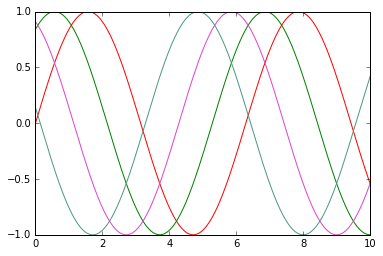

In [48]:
%matplotlib inline
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), color='red')
plt.plot(x, np.sin(x + 1), color='green')
plt.plot(x, np.sin(x + 2), color='#E144CC')  #HEX --> #0123456789ABCDEF |||| Binary ---> (0-1)
plt.plot(x, np.sin(x + 3), color=(0.3,0.6,0.5));

<p><b>Note:</b> You can use the <b style="color:red;">linestyle</b> attribute to specify your desired color.</p>

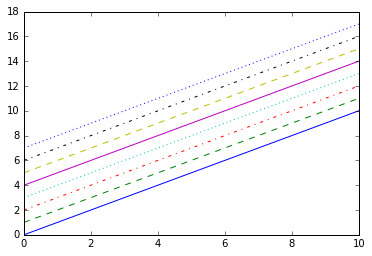

In [49]:
%matplotlib inline
x = np.linspace(0, 10, 1000)

plt.plot(x, x , linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted')

plt.plot(x, x + 4, linestyle='-') # solid 
plt.plot(x, x + 5, linestyle='--') # dashed 
plt.plot(x, x + 6, linestyle='-.') # dashdot 
plt.plot(x, x + 7, linestyle=':'); # dotted

<p><b>Note:</b> You can specify <u>title</u>, and <u>axis labels</u> for your figure.</p> 

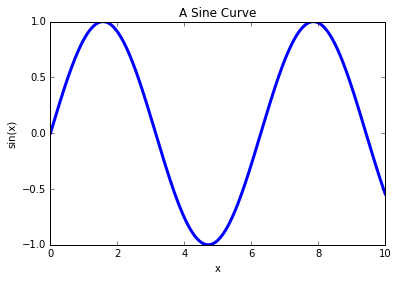

In [50]:
%matplotlib inline
x = np.linspace(0, 10, 1000)
plt.plot(x , np.sin(x), lw=3)     # lw allows you to determine the line width   
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

<p><b>Note:</b> If you have multiple plots in a figure, you can specify <u>legends</u>.</p> 

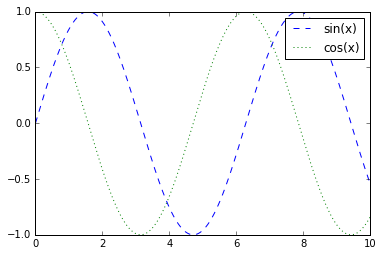

In [51]:
%matplotlib inline
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), linestyle='--', label='sin(x)')
plt.plot(x, np.cos(x), linestyle=':', label='cos(x)')

plt.legend();

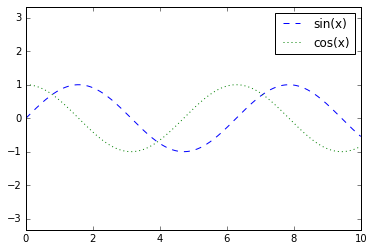

In [52]:
# if you don't want to put the legends on graphs, you can make the following modification to add some space
%matplotlib inline
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), linestyle='--', label='sin(x)')
plt.plot(x, np.cos(x), linestyle=':', label='cos(x)')
plt.axis('equal')

plt.legend();

In [ ]:
#lincespace generates numbers within a range!
#x = np.linspace(0, 10, 3)
#x

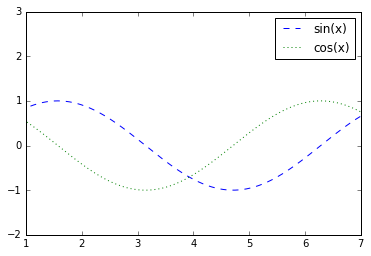

In [53]:
# Or you can define your desired ylim
%matplotlib inline
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), linestyle='--', label='sin(x)')
plt.plot(x, np.cos(x), linestyle=':', label='cos(x)')

plt.ylim(-2,3)
plt.xlim(1,7)
plt.legend();

### 2.2. Scatter Plots

<p>A scatter plot graphs two variables along two axes, the pattern of points can be used to detect any possible correlation.</p>

In [54]:
import pandas as pd
sp_data = pd.read_csv("Student-Performance/data.csv")
sp_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [55]:
sp_data.shape

(1000, 8)

In [56]:
sp_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [57]:
sp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [58]:
sp_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


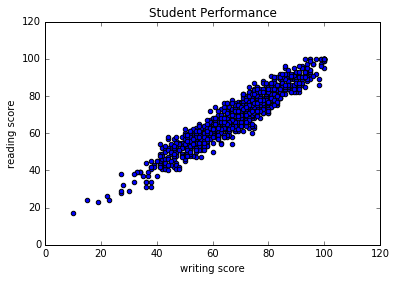

In [59]:
%matplotlib inline
plt.scatter(sp_data["writing score"], sp_data["reading score"])
plt.title("Student Performance")
plt.xlabel("writing score")
plt.ylabel("reading score");

<p><b>Note:</b> The main difference between <b style="color:blue;">plt.scatter</b> and <b style="color:blue;">plt.plot</b> is that the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data. However, <b style="color:blue;">plt.plot</b> can be noticeably more efficient than <b style="color:blue;">plt.scatter</b> for large datasets.</p>

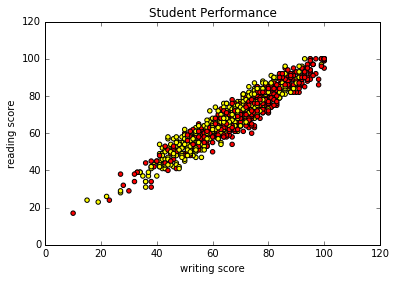

In [60]:
%matplotlib inline
colors = {'female':'red', 'male':'yellow'}

plt.scatter(sp_data["writing score"], sp_data["reading score"], c = sp_data['gender'].apply(lambda x: colors[x]))
plt.title("Student Performance")
plt.xlabel("writing score")
plt.ylabel("reading score");

In [61]:
# Let's use a new dataset
FIFA19 = pd.read_csv("Fifa19/data.csv")
print(FIFA19.shape)
FIFA19.columns

(18207, 89)


Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [380]:
FIFA19.sample(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
7732,7732,184084,M. Dreyer,29,https://cdn.sofifa.org/players/4/19/184084.png,France,https://cdn.sofifa.org/flags/18.png,67,68,Amiens SC,...,54.0,11.0,14.0,10.0,66.0,68.0,65.0,65.0,69.0,€1.2M
12506,12506,182387,Zhang Xiaofei,35,https://cdn.sofifa.org/players/4/19/182387.png,China PR,https://cdn.sofifa.org/flags/155.png,63,63,Changchun Yatai FC,...,61.0,66.0,68.0,63.0,15.0,13.0,10.0,14.0,6.0,€172K
12242,12242,208684,C. Dobnik,31,https://cdn.sofifa.org/players/4/19/208684.png,Austria,https://cdn.sofifa.org/flags/4.png,63,63,Wolfsberger AC,...,27.0,30.0,13.0,10.0,65.0,59.0,63.0,65.0,63.0,€319K
13504,13504,240252,V. Méndez,18,https://cdn.sofifa.org/players/4/19/240252.png,Chile,https://cdn.sofifa.org/flags/55.png,62,72,Unión Española,...,56.0,66.0,61.0,42.0,15.0,7.0,8.0,6.0,9.0,€620K
15791,15791,235250,Pedro Goulart,20,https://cdn.sofifa.org/players/4/19/235250.png,Mexico,https://cdn.sofifa.org/flags/83.png,59,70,Puebla FC,...,51.0,22.0,20.0,13.0,12.0,6.0,14.0,13.0,6.0,€513K
5068,5068,191059,Javi Márquez,32,https://cdn.sofifa.org/players/4/19/191059.png,Spain,https://cdn.sofifa.org/flags/45.png,70,70,Gimnàstic de Tarragona,...,63.0,57.0,62.0,59.0,13.0,10.0,6.0,10.0,9.0,€2.1M
16294,16294,245004,V. Vanbaleghem,21,https://cdn.sofifa.org/players/4/19/245004.png,France,https://cdn.sofifa.org/flags/18.png,57,65,La Berrichonne de Châteauroux,...,42.0,49.0,57.0,53.0,13.0,11.0,9.0,13.0,10.0,€254K
12157,12157,221716,T. Peay,26,https://cdn.sofifa.org/players/4/19/221716.png,United States,https://cdn.sofifa.org/flags/95.png,63,66,Real Salt Lake,...,49.0,60.0,60.0,59.0,11.0,15.0,11.0,12.0,14.0,€591K
14362,14362,226709,A. Melo,22,https://cdn.sofifa.org/players/4/19/226709.png,Argentina,https://cdn.sofifa.org/flags/52.png,61,72,Gimnasia y Esgrima La Plata,...,49.0,59.0,18.0,21.0,11.0,10.0,9.0,12.0,16.0,NaN
8994,8994,196145,Y. Anchico,34,https://cdn.sofifa.org/players/4/19/196145.png,Colombia,https://cdn.sofifa.org/flags/56.png,66,66,Independiente Medellín,...,62.0,62.0,64.0,68.0,16.0,14.0,15.0,12.0,12.0,€439K


In [379]:
#FIFA19.isnull().sum()

In [62]:
#let's filter the data to strikers and goalkeepers
filter_mask = (FIFA19.Position =='GK') | (FIFA19.Position =='ST')
FIFA19_filtered = FIFA19[filter_mask]
FIFA19_filtered.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
10,10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,90,FC Bayern München,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,€127.1M
16,16,202126,H. Kane,24,https://cdn.sofifa.org/players/4/19/202126.png,England,https://cdn.sofifa.org/flags/14.png,89,91,Tottenham Hotspur,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,€160.7M


In [63]:
FIFA19_filtered.shape

(4177, 89)

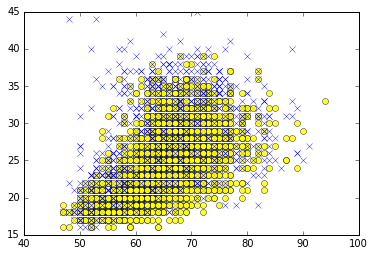

In [412]:
%matplotlib inline
markers = {'GK':'x','ST':'o'}
colors = {'GK':'blue','ST':'yellow'}
for index, row in FIFA19_filtered.iterrows():
    m = markers[row.Position]
    c = colors[row.Position]
    plt.plot(row.Overall,row.Age, linestyle = 'None', marker = m, color = c, alpha=0.8);

### 2.3. Histograms

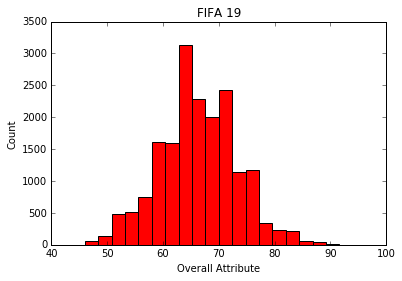

In [416]:
%matplotlib inline
plt.hist(FIFA19.Overall, bins=20, color='red', edgecolor='black')
plt.title("FIFA 19")
plt.xlabel("Overall Attribute")
plt.ylabel("Count");

In [417]:
FIFA19.Overall.shape

(18207,)

In [430]:
FIFA19.Overall.isnull().sum()

0

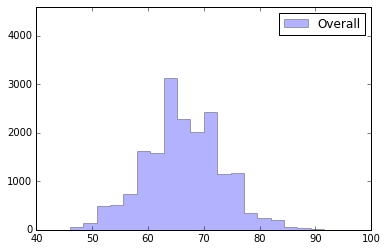

In [436]:
%matplotlib inline
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=20)
plt.hist(FIFA19.Overall, **kwargs, label='Overall')
#plt.hist(FIFA19.Finishing, **kwargs, label='Finishing')
#plt.hist(FIFA19.ShotPower, **kwargs, label='ShotPower')

plt.ylim(0 , 4600)
plt.legend()

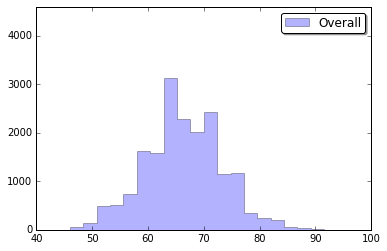

In [192]:
%matplotlib inline
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=20)
plt.hist(FIFA19.Overall, **kwargs, label='Overall')
#plt.hist(FIFA19.Finishing, **kwargs, label='Finishing')
#plt.hist(FIFA19.ShotPower, **kwargs, label='ShotPower')

plt.ylim(0 , 4600)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=.3)

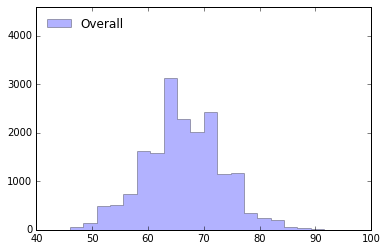

In [193]:
%matplotlib inline
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=20)
plt.hist(FIFA19.Overall, **kwargs, label='Overall')
#plt.hist(FIFA19.Finishing, **kwargs, label='Finishing')
#plt.hist(FIFA19.ShotPower, **kwargs, label='ShotPower')

plt.ylim(0 , 4600)
plt.legend(loc='upper left', frameon=False)

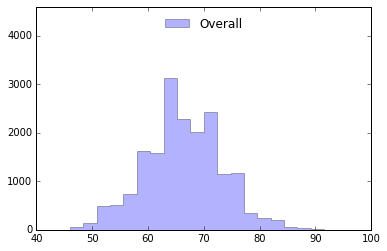

In [197]:
%matplotlib inline
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=20)
plt.hist(FIFA19.Overall, **kwargs, label='Overall')
#plt.hist(FIFA19.Finishing, **kwargs, label='Finishing')
#plt.hist(FIFA19.ShotPower, **kwargs, label='ShotPower')

plt.ylim(0 , 4600)
plt.legend(loc='upper center', frameon=False, ncol=4)

### 2.4. Pie Charts

In [437]:
# consider limited number of columns
FIFA19_Subset = FIFA19[['ID','Position','Age']].copy()

# Let's reduce the number of positions by considering just the first letter of the position
FIFA19_Subset['AggPosition'] = FIFA19_Subset.Position.apply(lambda x: str(x)[0])
FIFA19_Subset.head()

,ID,Position,Age,AggPosition
0,158023,RF,31,R
1,20801,ST,33,S
2,190871,LW,26,L
3,193080,GK,27,G
4,192985,RCM,27,R


In [443]:
# We don't need Posion column anymore
FIFA19_Subset = FIFA19_Subset.drop('Position',axis = 1)
FIFA19_Subset.head()

,ID,Age,AggPosition
15449,220994,22,L
17638,236431,25,G
2185,200765,25,L
592,215061,28,S
11174,236841,22,L
17641,225427,22,G
14842,246603,19,G
2679,230435,30,R
17533,239876,20,C
2116,215069,27,G


In [137]:
Pos_Count_Data = FIFA19_Subset.groupby('AggPosition').size().reset_index(name='Count')
Pos_Count_Data.head()

,AggPosition,Count
0,C,5152
1,G,2025
2,L,4405
3,R,4413
4,S,2152


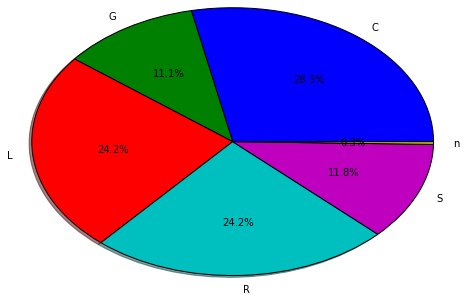

In [449]:
%matplotlib inline
plt.pie(Pos_Count_Data.Count, labels = Pos_Count_Data.AggPosition, 
        shadow=True, autopct='%1.1f%%', radius=1.5);

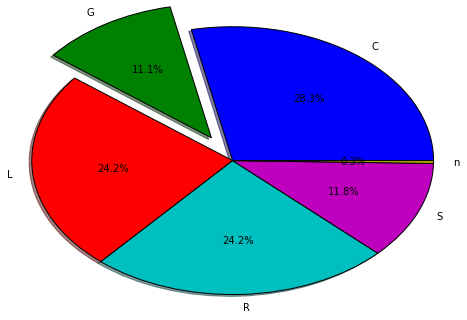

In [452]:
%matplotlib inline
plt.pie(Pos_Count_Data.Count, labels = Pos_Count_Data.AggPosition, 
        shadow=True, autopct='%1.1f%%', radius=1.5, explode=[0,.3,0,0,0,0]);

### 2.5. Bar Plots

In [140]:
FIFA19_Subset.head()

,ID,Age,AggPosition
0,158023,31,R
1,20801,33,S
2,190871,26,L
3,193080,27,G
4,192985,27,R


In [457]:
# find the average age of players in each position.
pos_avg_data = FIFA19[['Position','Age']].groupby('Position').mean().reset_index()

pos_avg_data = pos_avg_data.rename(columns={'Age':'avg_age'})

# find the standard deviation of players' age  in each position.
pos_std_data = FIFA19[['Position','Age']].groupby('Position').std().reset_index()
pos_std_data = pos_std_data.rename(columns={'Age':'std_age'})
# let's aggregate the data
pos_data = pd.merge(pos_avg_data, pos_std_data)
pos_data.head()

,Position,avg_age,std_age
0,CAM,24.580376,4.808921
1,CB,24.818335,4.887843
2,CDM,25.235232,4.730157
3,CF,23.513514,4.536740
4,CM,23.481349,4.577326


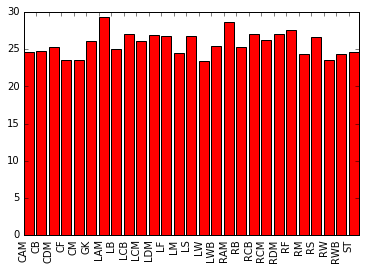

In [460]:
%matplotlib inline
plt.bar(pos_data.Position, pos_data.avg_age, color='red')
plt.xticks(rotation=90);

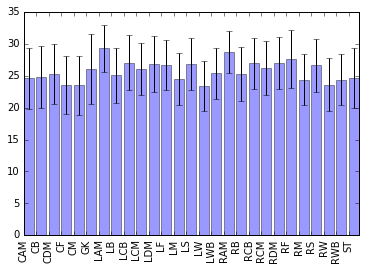

In [462]:
%matplotlib inline
plt.bar(pos_data.Position, pos_data.avg_age, yerr=pos_data.std_age, alpha=0.4)
plt.xticks(rotation=90);

### 2.6. Annotation

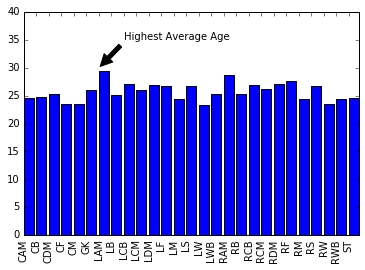

In [470]:
%matplotlib inline
fig, ax = plt.subplots()
plt.ylim(0,40)
plt.xticks(rotation=90)
ax.bar(pos_data.Position, pos_data.avg_age);
ax.annotate('Highest Average Age', xy = ('LAM', 30), xytext=('LCB', 35),
            arrowprops = dict(facecolor='black', shrink = 0.05));

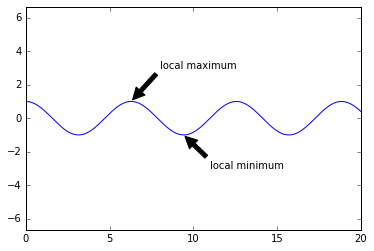

In [472]:
%matplotlib inline
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy = (6.28, 1), xytext=(8, 3),
            arrowprops = dict(facecolor='black', shrink = 0.05))
ax.annotate('local minimum', xy = (9.42, -1), xytext=(11, -3),
            arrowprops = dict(facecolor='black', shrink = 0.05));

<p><b>Note:</b> Here is a <a herf='https://matplotlib.org/users/annotations.html'>link</a> to full overview of annotation. </p>

### 2.7. Box Plots

In [147]:
# Let's create boxplots for 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling
# Step 1 - Remove null datat
FIFA19_Subset = FIFA19[['Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling']].copy()
print(FIFA19_Subset.shape)
FIFA19_Subset = FIFA19_Subset.dropna()
print(FIFA19_Subset.shape)

(18207, 5)
(18159, 5)


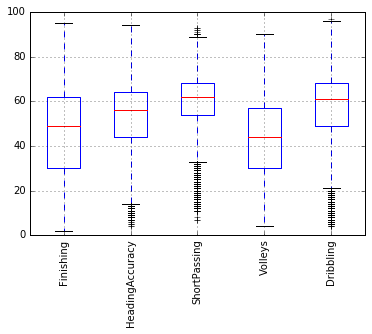

In [148]:
%matplotlib inline
FIFA19_Subset.boxplot(rot=90);

### 2.8. Working with Images

(48, 48, 4)


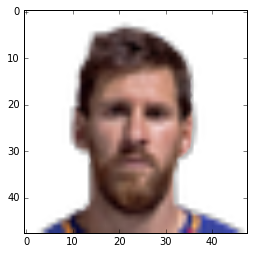

In [480]:
# read images
import urllib.request

url = 'https://cdn.sofifa.org/players/4/19/158023.png'

user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
headers={'User-Agent':user_agent,}
request=urllib.request.Request(url,None,headers)

response = urllib.request.urlopen(request)

import matplotlib.image as mpimg
img = mpimg.imread(response)
plt.imshow(img);
print(img.shape)

<p><b>Example:</b> Show pictures top-25 players with highest overall scores.</p>  

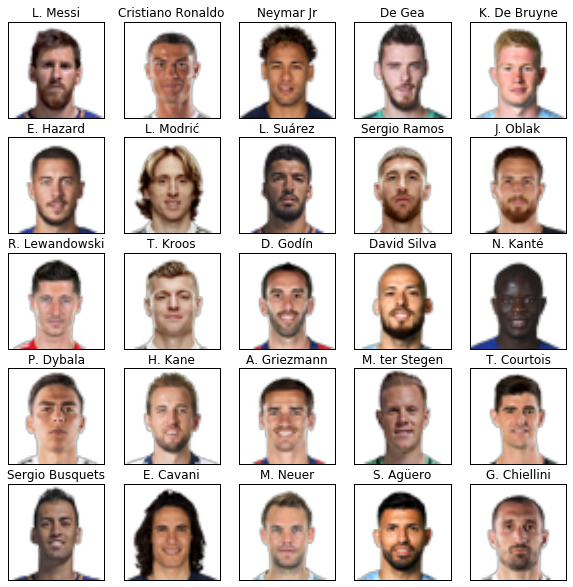

In [495]:
# sort fifa19_data by overall score
FIFA19_sorted = FIFA19.sort_values(by = ['Overall'], ascending=False)
top_25 = FIFA19_sorted[0:25]

fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    url = top_25.loc[i,'Photo']
    request=urllib.request.Request(url,None,headers)
    response = urllib.request.urlopen(request)
    img = mpimg.imread(response)
    axi.imshow(img)
    axi.set_title(top_25.loc[i,'Name'])
    axi.set(xticks=[], yticks=[])

In [ ]:
img = plt.imread('flower.jpg')
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()
#pixels = orig.flatten()

In [ ]:
Reduction to grayscale image
collapsed = img.mean(axis=2)
print(collapsed.shape)
plt.set_cmap('gray')
plt.imshow(collapsed, cmap='gray')

In [ ]:
#Slicing time series
tem = weather['temperature']
march_apr = temperature['2010-03': '2010-04']
march_apr.shape
march_apr.iloc[-4:] #extract last 4 entries 

In [ ]:
n_all_heads =0
for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4
     n_all_heads += 1
        
n_all_heads/10000

## 3. Dimensionality reduction

<p>Oftentimes, you will have to deal with a dataset containing a large number of features, many of which may be unnecessary. This is a typical problem where some features are very informative for the prediction, some are somehow related, and some are completely unrelated (that is, they only contain noise or irrelevant information). Keeping only the interesting features is a way to not only make your dataset more manageable but also have predictive algorithms work better instead of being fooled in their predictions by the noise in the data.</p>

<p><b>Note:</b> Checking the correlation matrix can be a very good strating point.</p>

In [496]:
# let's get back to iris dataset
iris_dataset.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<p><b>Question:</b> How we should interpret this matirx?</p>

### 3.1. Principal Component Analysis

<p>PCA reduces the dimensionality (the number of variables) of a data set by maintaining as much variance as possible. Principal component analysis (PCA) rotates the original data space such that the axes of the new coordinate system point into the directions of highest variance of the data. The axes or new variables are termed principal components (PCs) and are ordered by variance: The first component, PC 1, represents the direction of the highest variance of the data. The direction of the second component, PC 2, represents the highest of the remaining variance orthogonal to the first component. This can be naturally extended to obtain the required number of components which together span a component space covering the desired amount of variance.

<p><b>Source:</b> http://www.nlpca.org/pca_principal_component_analysis.html</b>

<img src='http://www.nlpca.org/fig-pca-principal-component-analysis-m.png' />

<p><b>Note:</b> The new features obtained from PCA are linear combinations of the current features. </p>

In [502]:
# The correlation matrix indicates that reducing data into two dimension can be a good idea
from sklearn.decomposition import PCA
pca_2c = PCA(n_components=2)                                # Set the number of desired components
projection = pca_2c.fit_transform(iris_dataset.iloc[:,0:4])     # Fit the PCA model
projection.shape                                            # The result is in the form of numpy's ndarray 

(150, 2)

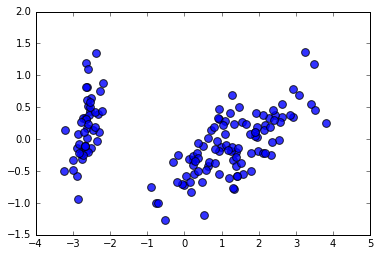

In [157]:
plt.scatter(projection[:,0], projection[:,1], alpha=0.8, marker='o', s=60);

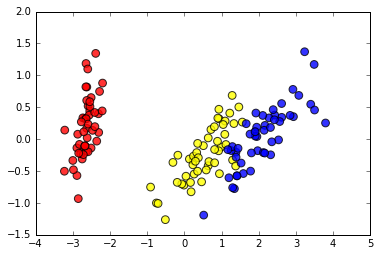

In [158]:
colors = {'setosa': 'red', 'versicolor':'yellow', 'virginica':'blue'}
plt.scatter(projection[:,0], projection[:,1], alpha=0.8, marker='o', 
            s=60, c=iris_dataset.target.apply(lambda x: colors[x]));

<p><b>Note: (For Your Info)</b> To reduce from <i>n</i>-dimensions to <i>k</i>-dimensions. PCA uses eigenvectors of the covariance matrix and computes Singular Value Decomposition (SVD) of the matrix.</p>

### 3.2. Randomized Principal Component Analysis (For Big Data)

<p>The main issue with PCA is the complexity of the underlying singular value decomposition (SVD) algorithm that does the reduction work, making the whole process very difficult to scale. There is a faster algorithm in Scikit-learn based on randomized SVD. It is a lighter but approximate iterative decomposition method. Using randomized SVD, the full-rank reconstruction is not perfect, and the basis vectors are optimized locally during every iteration. </p>

In [ ]:
from sklearn.decomposition import PCA
rpca_2c = PCA(svd_solver='randomized', n_components=2)
projection = rpca_2c.fit_transform(iris_dataset.iloc[:,0:4])

colors = {'setosa': 'red', 'versicolor':'yellow', 'virginica':'blue'}
plt.scatter(projection[:,0], projection[:,1], alpha=0.8, s=60, marker='o',
            c=iris_dataset.target.apply(lambda x: colors[x]));

### 3.3. ISOMAP

<p>Isomap is a <u>nonlinear</u> dimensionality reduction method. It is one of several widely used low-dimensional embedding methods. Isomap is distinguished by its use of the geodesic distance induced by a neighborhood graph embedded in the classical scaling.</p>

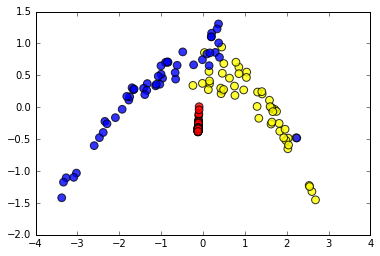

In [159]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(iris_dataset.iloc[:,0:4])

colors = {'setosa': 'red', 'versicolor':'yellow', 'virginica':'blue'}
plt.scatter(projection[:,0], projection[:,1], alpha=0.8, s=60, marker='o',
            c=iris_dataset.target.apply(lambda x: colors[x]));

<p><b>Example:</b> Let's see a practical example of dimensionality reduction.</p>

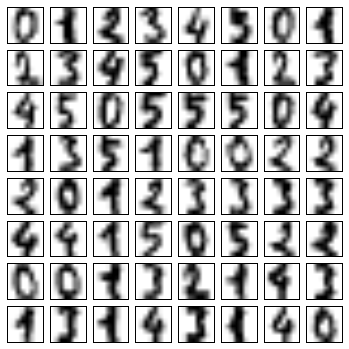

In [160]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8, 8, figsize=(6, 6)) 
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

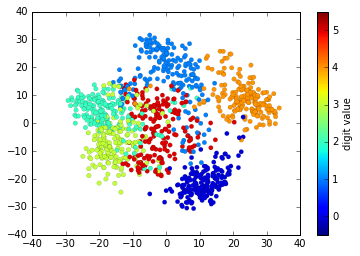

In [161]:
# Dimension reduction with PCA
from sklearn.decomposition import PCA
rpca_2c = PCA(n_components=2)
projection = rpca_2c.fit_transform(digits.data)

plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, c = digits.target)
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

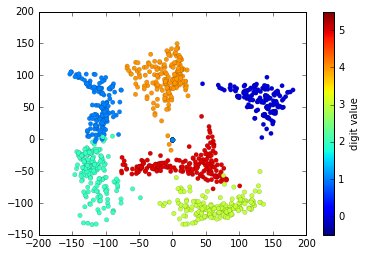

In [162]:
# Dimension reduction with ISOMAP
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, c=digits.target)
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [18]:
4. Outliers

<p>When a data point deviates markedly from the others in a sample, it is called an outlier. A data point may be an outlier due to three general causes. Here, we discuss about two of them:</p>

<ol>
    <li>The point represents a rare occurrence, but it is also a possible value, given the fact that the available data is just a sample of the original data distribution. In such an occurrence, the generative underlying process is the same for all the points, but the outlying point may be deemed as unsuitable for a generalization by machine learning due to its rarity. In such a case, the point is commonly removed or underweighted.</li>
    <li>The point is clearly some kind of a mistake. For some reason, there has been a data entry error or a problem with data integrity that modified the original value and replaced it with an inconsistent value. The best course of action is to remove the value and treat it as a value that is missing at random. In this case, it is common to replace the outlier with a mean or the most common class depending on whether it is a regression or a classification problem. If it is not convenient or possible to do so, then we suggest that you just remove the example from the dataset.
    </li>
</ol>

<p><b>Source</b>: Alberto Boschetti. “Python Data Science Essentials.” </p>`

### 4.1. Univariate outlier detection

<p>The univariate methods are usually based on explonatory data analysis and visualizations such as boxplots. You can also use Z-score, observations with scores higher than 3 in an absolute value have to be considered as suspect outliers.</p>